In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [2]:
df = pd.read_csv('/home/zhaoxiang/output/ColorJitter_reconstruction_0.0001_700_colorRange_100_threshold_200_ws_skip_connection_ColorJitter/test_full_stats.csv')
print(df)

      img_path  label  a_map_max
0            0      0   0.001805
1            0      0   0.002889
2            0      0   0.002396
3            0      0   0.001320
4            0      0   0.001442
...        ...    ...        ...
1537         0      0   0.001439
1538         0      0   0.000806
1539         0      0   0.001008
1540         0      0   0.000692
1541         0      0   0.000921

[1542 rows x 3 columns]


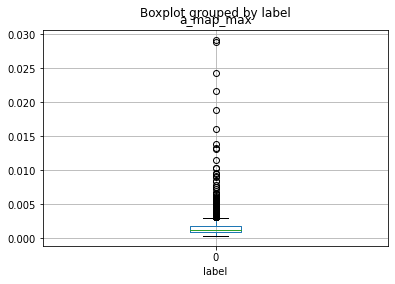

In [5]:
# df_short = df[:10000]

ax = df.boxplot(by='label', column='a_map_max')

AttributeError: 'Rectangle' object has no property 'column'

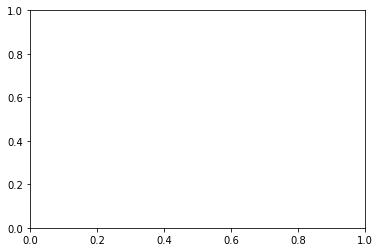

In [18]:


# print(df)

# ax = df.plot.scatter(y = 'label', x = 'a_map_max')

# ax = df.plot.bar(x='label', y='a_map_max')
df_new = pd.DataFrame(columns=['good', 'bad'])


df_good = df[df['label']=='tensor([0])']
df_bad = df[df['label']=='tensor([1])']

df_new['good'] = df_good['a_map_max']
df_new['bad'] = df_bad['a_map_max']
# ax = df_new.plot.bar(column=['good', 'bad'])

# print(df_normal)

In [6]:
stats = df.groupby(['label'])['a_map_max'].agg(['mean', 'sem'])
stats

,mean,sem
label,,
0,0.001722,0.000048


In [8]:
stats['ci95_hi'] = stats['mean'] + 1.96* stats['sem']
stats['ci95_lo'] = stats['mean'] - 1.96* stats['sem']
print(stats)

           mean       sem  ci999_hi  ci999_lo   ci95_hi   ci95_lo
label                                                            
0      0.001722  0.000048  0.001879  0.001565  0.001816  0.001629


In [7]:
stats['ci999_hi'] = stats['mean'] + 3.29* stats['sem']
stats['ci999_lo'] = stats['mean'] - 3.29* stats['sem']
print(stats)

           mean       sem  ci999_hi  ci999_lo
label                                        
0      0.001722  0.000048  0.001879  0.001565
